<a href="https://colab.research.google.com/github/meenakshi-12345/netflix-eda-project/blob/main/NETFLIX_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

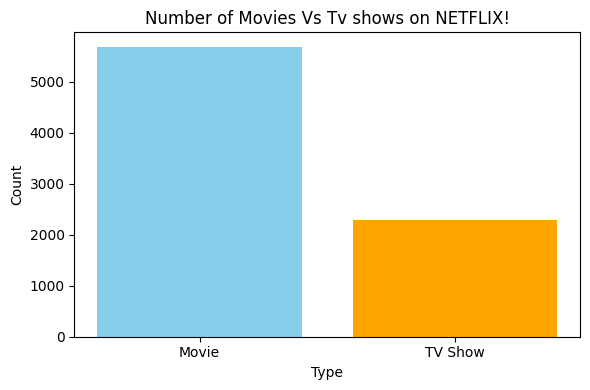

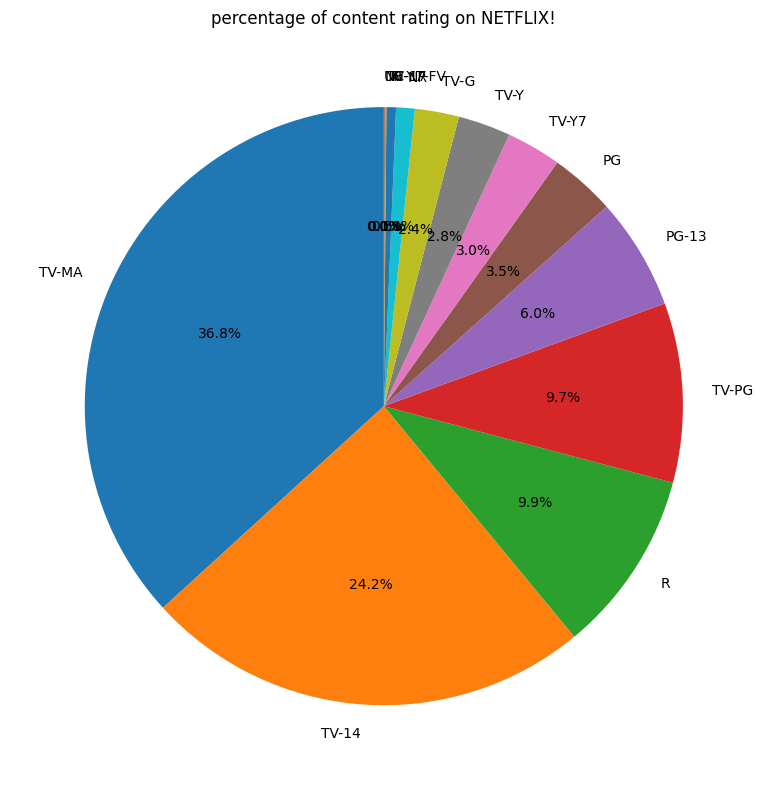

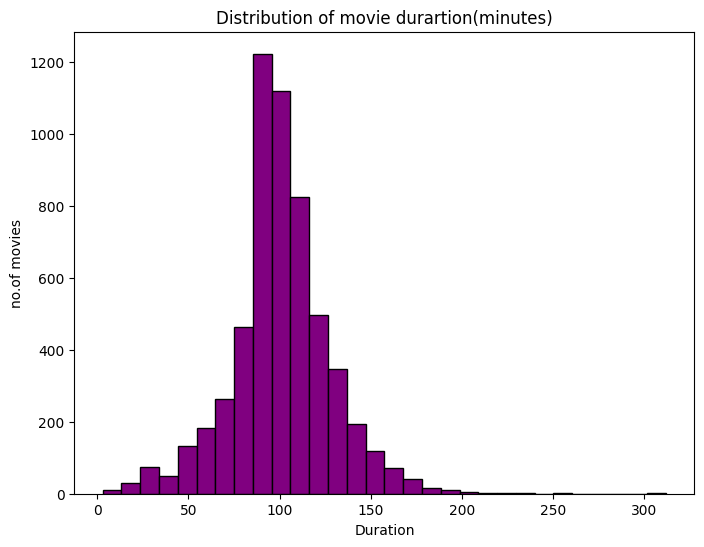

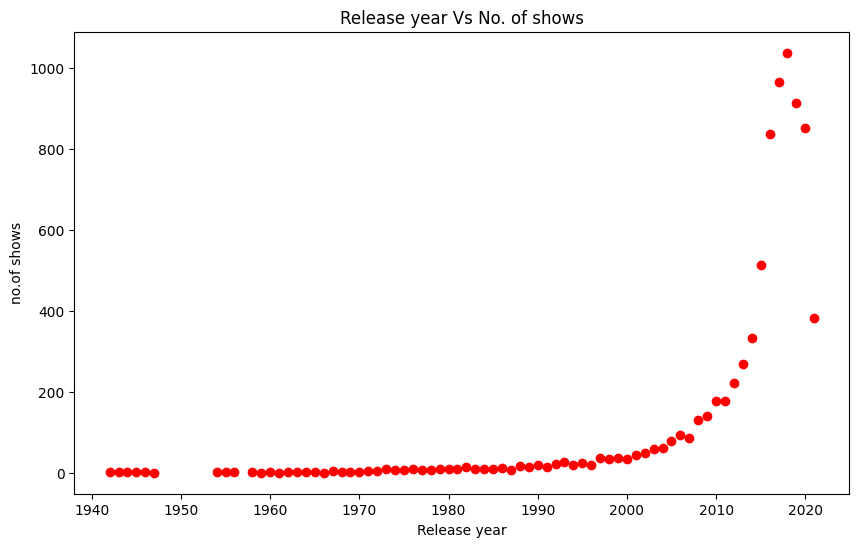

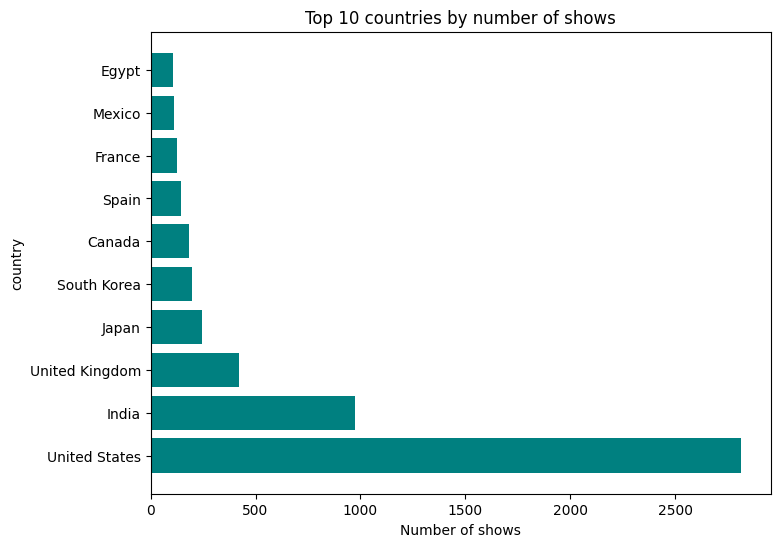

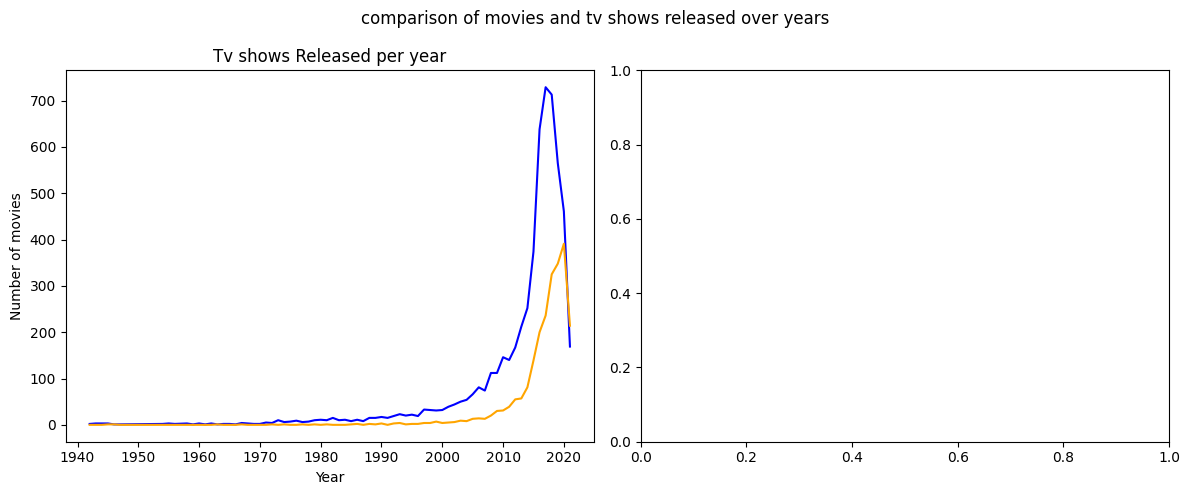

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("netflix_titles.csv")

##cleaning dataset

df=df.dropna(subset=['type','release_year', 'rating', 'country', 'duration'])

type_count=df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_count.index,type_count.values,color=['skyblue','orange'])
plt.title("Number of Movies Vs Tv shows on NETFLIX!")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show()



##rating counts

rating_counts=df['rating'].value_counts()
plt.figure(figsize=(20,8))
plt.pie(rating_counts,labels=rating_counts.index,autopct='%1.1f%%',startangle=90 )
plt.title("percentage of content rating on NETFLIX!")

plt.tight_layout()
plt.savefig('content_ratings.png')    # Move % labels closer to center
plt.show()



##duration of movies

movie_df= df[df['type']=="Movie"].copy()
movie_df['duration_int']=movie_df['duration'].str.replace(' min','').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'], bins=30,color='purple', edgecolor='black')
plt.title("Distribution of movie durartion(minutes)")
plt.xlabel('Duration')
plt.ylabel("no.of movies")
plt.savefig("movie duration_histogram.png")
plt.show()

##scatter plot
release_counts=df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index,release_counts.values,color='red')
plt.title("Release year Vs No. of shows")
plt.xlabel('Release year')
plt.ylabel("no.of shows")
plt.savefig("movie releaseyear.png")
plt.show()



##top 10 countries who gave most shows

country_counts=df["country"].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index,country_counts.values, color='teal')
plt.title("Top 10 countries by number of shows")
plt.xlabel('Number of shows')
plt.ylabel("country")
plt.savefig("top 10 country.png")
plt.show()

content_by_year= df.groupby(['release_year','type']).size().unstack().fillna(0)
fig,ax=plt.subplots(1,2,figsize=(12,5))

##first subplot : movies

ax[0].plot(content_by_year.index, content_by_year['Movie'], color='blue')
ax[0].set_title('Movies Released per year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel("Number of movies")

ax[0].plot(content_by_year.index, content_by_year['TV Show'], color='orange')
ax[0].set_title('Tv shows Released per year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel("Number of movies")

fig.suptitle("comparison of movies and tv shows released over years")
plt.tight_layout()
plt.savefig('movies_tv_shows_comparison.png')
plt.show()